<a href="https://colab.research.google.com/github/Aghniyaan/credit-risk-classification/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_AGHNIYA_AULIA_NISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
# Import library
import pandas as pd          # manipulasi data
import numpy as np           # operasi numerik
from sklearn.preprocessing import StandardScaler  # standarisasi fitur
from sklearn.cluster import KMeans                # Algoritma clustering
import matplotlib.pyplot as plt                   # Visualisasi dasar
import seaborn as sns                             # Visualisasi yang lebih estetik
from sklearn.decomposition import PCA             # reduksi dimensi sebelum visualisasi
from sklearn.metrics import silhouette_score      # evaluasi kualitas clustering

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv')

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

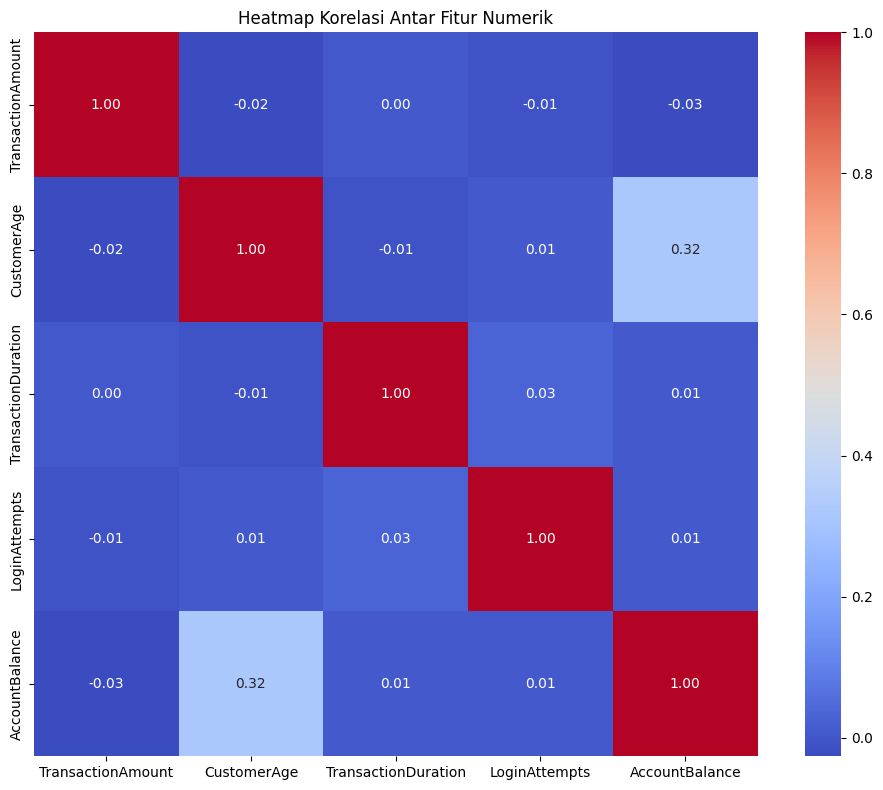

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

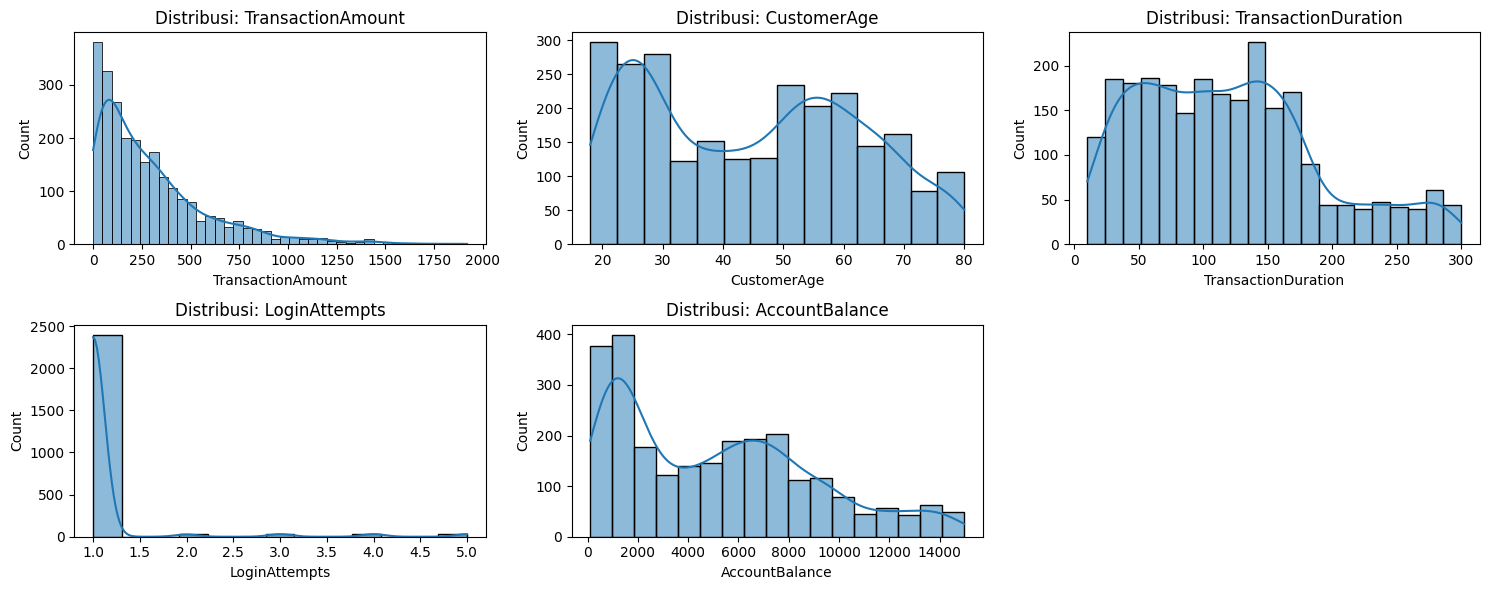

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = numeric_df.columns

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi: {col}")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

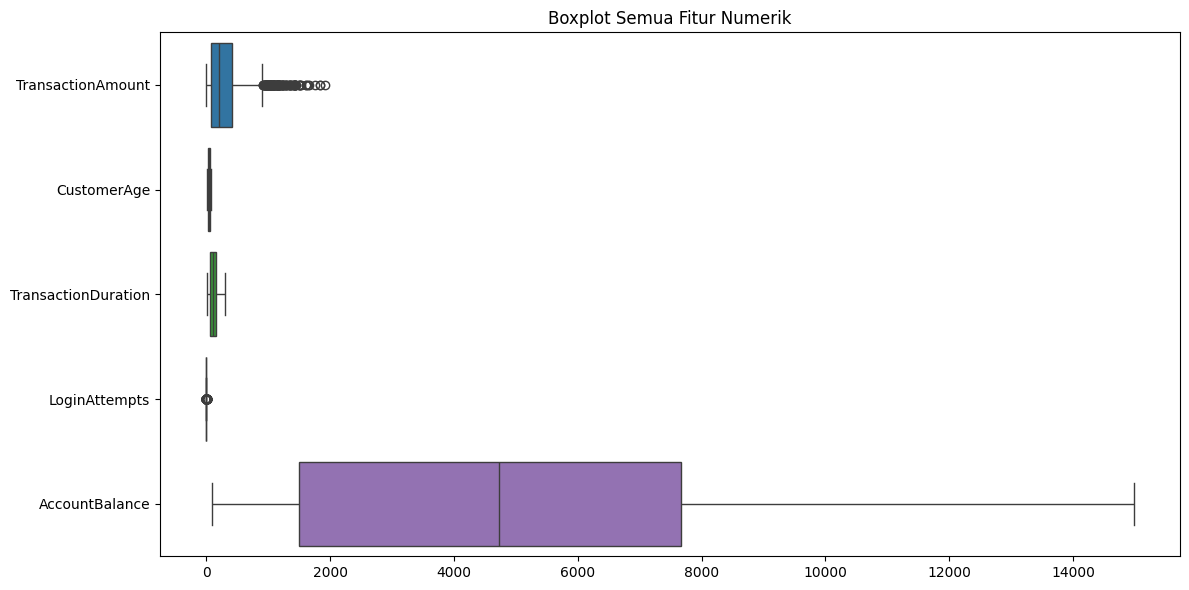

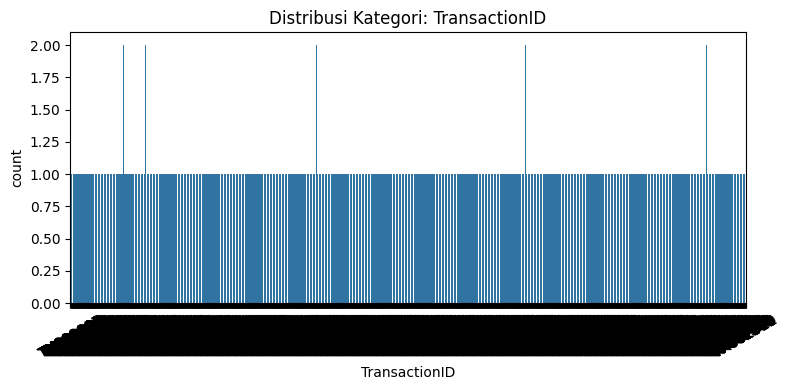

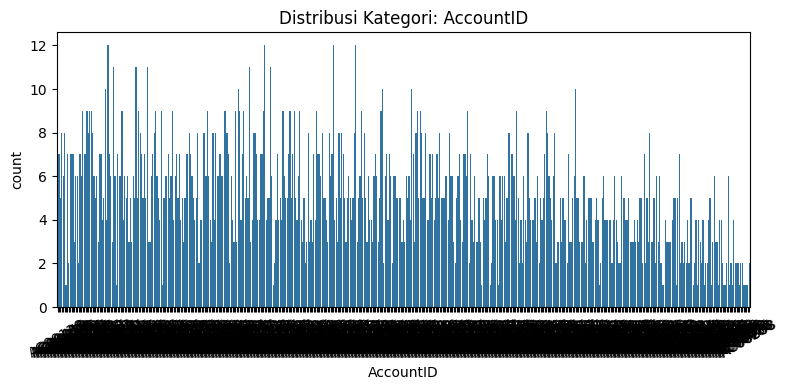

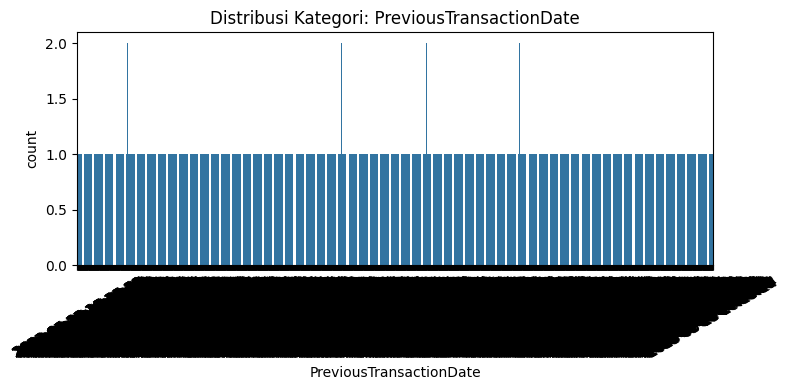

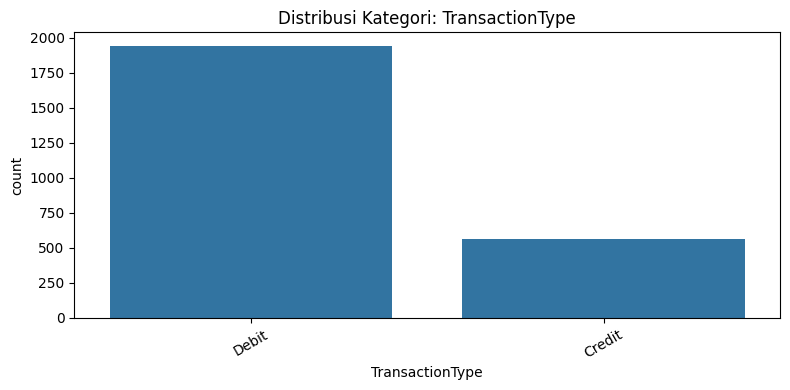

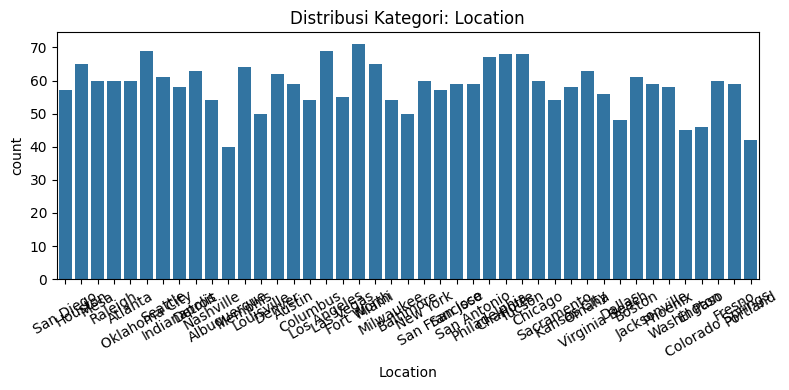

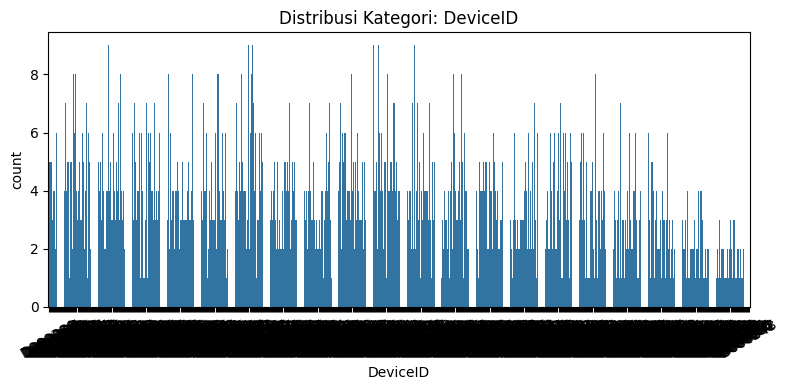

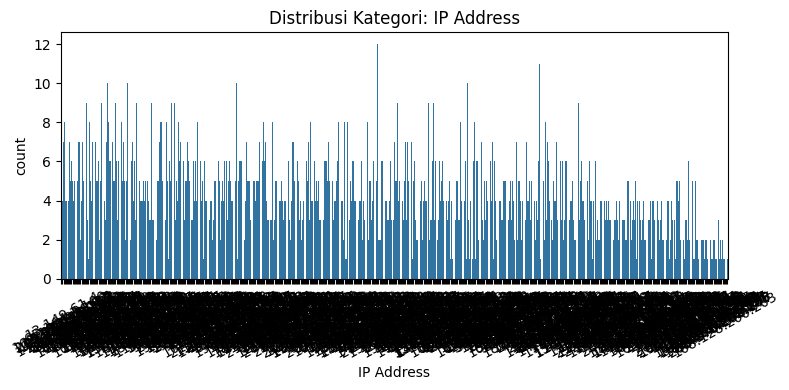

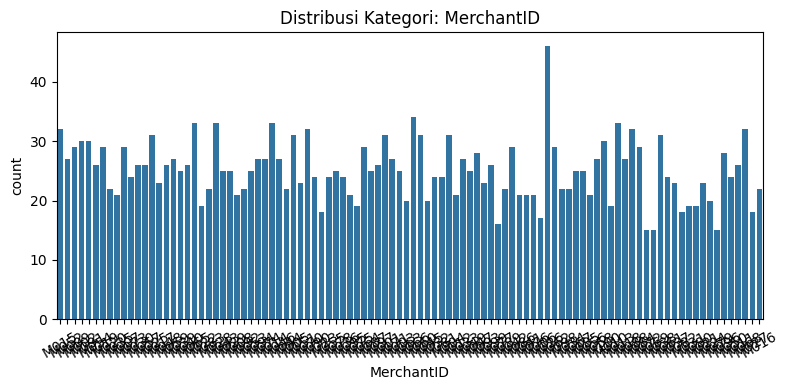

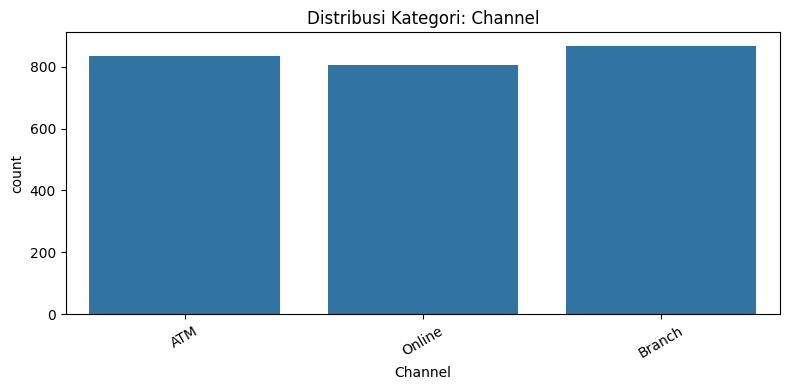

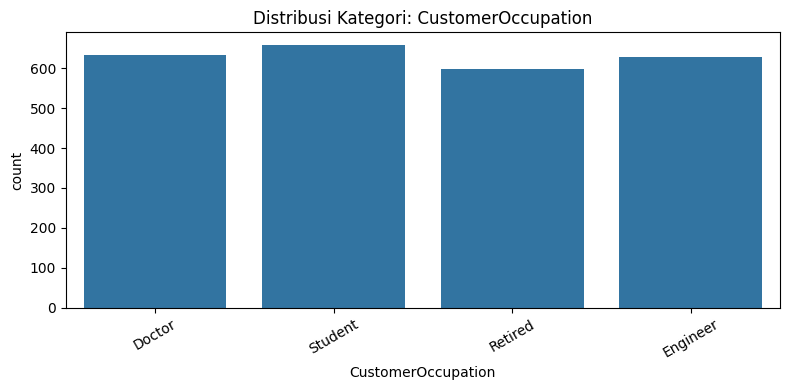

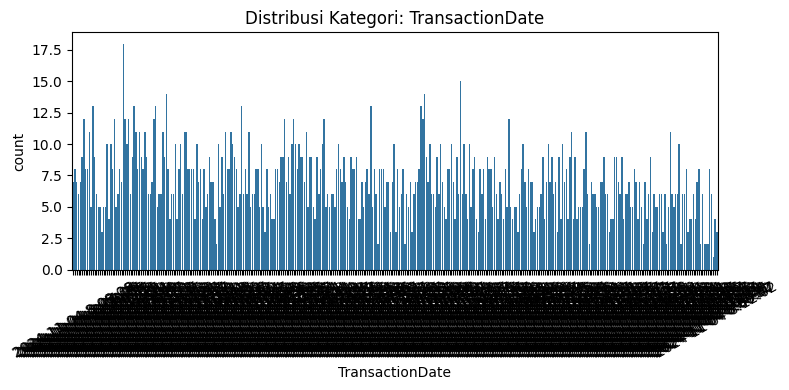

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Boxplot semua fitur numerik untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient='h')
plt.title("Boxplot Semua Fitur Numerik")
plt.tight_layout()
plt.show()

# Countplot kategori jika ada kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribusi Kategori: {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("\nJumlah nilai null per kolom:")
print(df.isnull().sum())

print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah nilai null per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

Jumlah data duplikat:
21


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df = df.fillna(df.median(numeric_only=True))  # imputasi numerik
df = df.fillna(df.mode().iloc[0])             # imputasi kategorikal
# Jika masih ada null tersisa, drop
df = df.dropna()
print("\nSetelah imputasi/drop, jumlah nilai null:")
print(df.isnull().sum())


Setelah imputasi/drop, jumlah nilai null:
TransactionID              0
AccountID                  0
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()  # atau MinMaxScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_cols]),
                              columns=numeric_cols)


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
drop_cols = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
if drop_cols:
    df = df.drop(columns=drop_cols)
    print(f"🗑️ Kolom yang dihapus: {drop_cols}")
else:
    print("ℹ️ Tidak ditemukan kolom dengan keterangan 'id' atau 'IP Address'.")

🗑️ Kolom yang dihapus: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder

# pastikan kita bekerja pada salinan agar tidak terjadi SettingWithCopyWarning
df = df.copy()

# deteksi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kolom kategorikal terdeteksi:", categorical_cols)

label_encoders = {}

if len(categorical_cols) == 0:
    print("Tidak ada kolom kategorikal untuk di-encode.")
else:
    for col in categorical_cols:
        # 1) Tangani missing: isi dengan token khusus agar encoding deterministik
        if df[col].isnull().any():
            df.loc[:, col] = df[col].fillna("__MISSING__")
            print(f"- Kolom '{col}' memiliki missing; diisi dengan '__MISSING__' sebelum encoding.")
        # 2) Pastikan tipe string (menghindari masalah bila kolom berisi angka tetapi kategorikal)
        #    lalu lakukan LabelEncoder
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"- Selesai encoding kolom '{col}': {len(le.classes_)} kelas -> {list(le.classes_)[:10]}{'...' if len(le.classes_)>10 else ''}")

    # Tampilkan head setelah encoding (wajib ada)
    print("\n✅ Data setelah Label Encoding (preview):")
    display(df.head())

Kolom kategorikal terdeteksi: ['PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionDate']
- Selesai encoding kolom 'PreviousTransactionDate': 2485 kelas -> ['2023-01-02 16:00:06', '2023-01-02 16:01:14', '2023-01-02 16:01:26', '2023-01-02 16:06:29', '2023-01-02 16:07:17', '2023-01-02 16:22:54', '2023-01-02 16:27:18', '2023-01-02 16:30:09', '2023-01-02 16:31:28', '2023-01-02 16:36:02']...
- Selesai encoding kolom 'TransactionType': 2 kelas -> ['Credit', 'Debit']
- Selesai encoding kolom 'Location': 43 kelas -> ['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago', 'Colorado Springs', 'Columbus', 'Dallas']...
- Selesai encoding kolom 'Channel': 3 kelas -> ['ATM', 'Branch', 'Online']
- Selesai encoding kolom 'CustomerOccupation': 4 kelas -> ['Doctor', 'Engineer', 'Retired', 'Student']
- Selesai encoding kolom 'TransactionDate': 360 kelas -> ['2024-11-04 8:06:23', '2024-11-04 8:06:24', '2024-11-04 8:06:25', '202

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
print("\nJumlah nilai null per kolom:")
print(df.isnull().sum())

print("\nJumlah data duplikat:", df.duplicated().sum())

# Gunakan median untuk numerik dan mode untuk kategorikal
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])
df = df.dropna()  # untuk pastikan semua sudah bersih

print("\nSetelah imputasi/drop, jumlah nilai null:")
print(df.isnull().sum())



Jumlah nilai null per kolom:
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

Jumlah data duplikat: 23

Setelah imputasi/drop, jumlah nilai null:
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64


/tmp/ipython-input-2991572701.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(df.mode().iloc[0])


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nJumlah baris dihapus karena duplikat: {before - after}")


Jumlah baris dihapus karena duplikat: 23


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"Kolom {col} memiliki {outlier_count} outlier.")

    # Jika outlier lebih dari 5% data, gunakan imputasi median
    if outlier_count > 0.05 * len(df):
        median_value = df[col].median()
        df.loc[df[col] < lower, col] = median_value
        df.loc[df[col] > upper, col] = median_value
    else:
        df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\n✅ Selesai handling outlier.")

Kolom TransactionAmount memiliki 113 outlier.
Kolom PreviousTransactionDate memiliki 0 outlier.
Kolom TransactionType memiliki 542 outlier.
Kolom Location memiliki 0 outlier.
Kolom Channel memiliki 0 outlier.
Kolom CustomerAge memiliki 0 outlier.
Kolom CustomerOccupation memiliki 0 outlier.
Kolom TransactionDuration memiliki 0 outlier.
Kolom LoginAttempts memiliki 115 outlier.
Kolom AccountBalance memiliki 0 outlier.
Kolom TransactionDate memiliki 0 outlier.

✅ Selesai handling outlier.


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Pilih fitur numerik yang akan dibinning
# (ganti nama kolom sesuai dataset kamu)
bin_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col in ['amount', 'customer_age']]

for feature in bin_features:
    # Pastikan kolomnya ada
    if feature not in df.columns:
        print(f"⚠️ Kolom '{feature}' tidak ditemukan di dataset, dilewati.")
        continue

    # Membuat kategori berdasarkan kuartil (4 bin)
    df[f"{feature}_bin"] = pd.qcut(df[feature], q=4, labels=["Low", "Medium", "High", "Very High"])
    print(f"\nBinning selesai untuk fitur '{feature}':")
    print(df[f"{feature}_bin"].value_counts())

    # Encode hasil binning menggunakan LabelEncoder
    le_bin = LabelEncoder()
    df[f"{feature}_bin"] = le_bin.fit_transform(df[f"{feature}_bin"].astype(str))
    print(f"Encoding selesai untuk '{feature}_bin' -> kelas: {list(le_bin.classes_)}")

# Tampilkan hasil akhir
print("\n✅ Hasil setelah binning + encoding:")
display(df.head())


✅ Hasil setelah binning + encoding:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
4,13.45,1939,1,1,2,45.0,3,198.0,1.0,7429.40,16


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2286.000000,2286.000000,2286.0,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.0,2286.000000,2286.000000
mean,254.983902,1225.751969,1.0,20.987314,0.989501,44.639983,1.521872,118.886264,1.0,5120.533543,178.852581
std,216.667308,723.564004,0.0,12.225644,0.802007,17.649055,1.132841,69.546460,0.0,3861.408799,102.153275
min,0.260000,0.000000,1.0,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,101.250000,0.000000
25%,78.530000,603.250000,1.0,11.000000,0.000000,27.000000,1.000000,63.000000,1.0,1524.992500,92.000000
50%,200.015000,1221.500000,1.0,21.000000,1.000000,45.000000,2.000000,112.000000,1.0,4734.110000,177.500000
75%,372.477500,1851.750000,1.0,31.000000,2.000000,59.000000,3.000000,161.000000,1.0,7619.557500,268.000000
max,896.790000,2484.000000,1.0,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000,359.000000


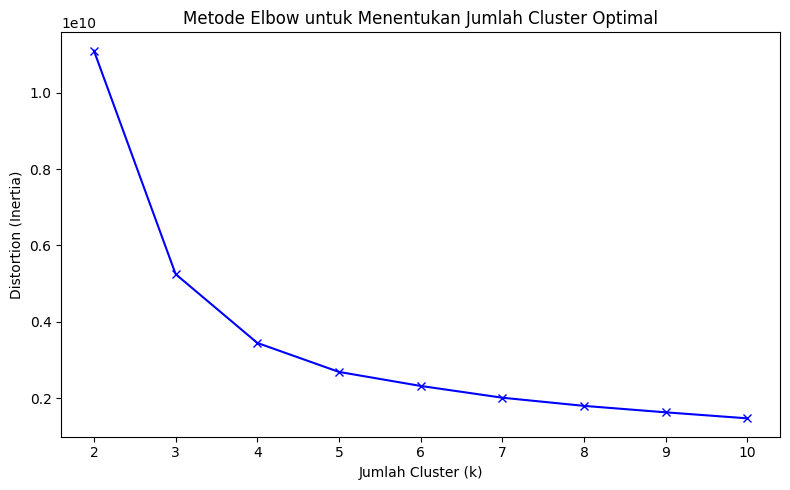

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Pastikan pakai DataFrame hasil preprocessing
X = df.select_dtypes(include=[np.number]).copy()

distortions = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.tight_layout()
plt.show()


In [21]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans
import joblib

chosen_k = 4  # Ubah sesuai hasil elbow visual kamu

model_kmeans = KMeans(n_clusters=chosen_k, n_init=25, random_state=42)
model_kmeans.fit(X)


KMeans(n_clusters=4, n_init=25, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")
print("✅ Model KMeans disimpan sebagai model_clustering.h5")


✅ Model KMeans disimpan sebagai model_clustering.h5


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

labels = model_kmeans.labels_
sil_score = silhouette_score(X, labels)
print(f"✅ Silhouette Score untuk k={model_kmeans.n_clusters}: {sil_score:.4f}")


✅ Silhouette Score untuk k=4: 0.5093


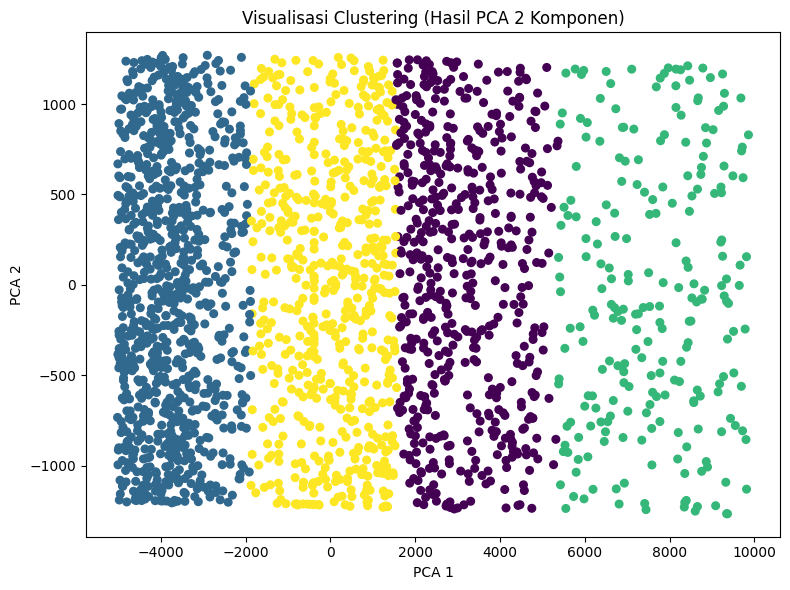

In [24]:
# Membuat visualisasi hasil clustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_vis = PCA(n_components=2, random_state=42)
X_pca = pca_vis.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Visualisasi Clustering (Hasil PCA 2 Komponen)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

pca_model = PCA(n_components=2, random_state=42)
pca_data = pca_model.fit_transform(X)

# Menyimpan data PCA sebagai DataFrame
PCA_2 = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# KMeans baru dengan data PCA
model_kmeans_pca = KMeans(n_clusters=chosen_k, n_init=25, random_state=42)
model_kmeans_pca.fit(PCA_2)

print(f"✅ Model KMeans pada data PCA selesai dilatih (k={chosen_k})")
display(PCA_2.head())

✅ Model KMeans pada data PCA selesai dilatih (k=4)


,PCA1,PCA2
0,-10.977295,-544.791418
1,8637.891262,-94.378728
2,-3997.863937,58.225914
3,3446.361124,-426.103182
4,2312.797933,702.139352


In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
import joblib

joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
print("✅ Model PCA-based clustering disimpan sebagai PCA_model_clustering.h5")

✅ Model PCA-based clustering disimpan sebagai PCA_model_clustering.h5


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Tambahkan label cluster ke dataset
# Pastikan kolom Target sudah ada
import numpy as np
import pandas as pd

# --- Validasi awal ---
# Pastikan df ada
try:
    df
except NameError:
    raise NameError("Variabel `df` tidak ditemukan. Pastikan DataFrame hasil preprocessing bernama `df`.")

# Pastikan model_kmeans ada
try:
    model_kmeans
except NameError:
    raise NameError("Variabel `model_kmeans` tidak ditemukan. Pastikan model KMeans sudah dibuat sebelumnya.")

# Ambil kolom numerik saja (agar agg mean/min/max aman)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) == 0:
    raise ValueError("Tidak ditemukan kolom numerik di `df`. Pastikan ada setidaknya satu fitur numerik untuk analisis.")

# Pastikan label cluster (Target) sesuai panjang dataframe
# Jika Target belum ada atau panjang tidak sesuai, buat/update dari model_kmeans
if 'Target' not in df.columns or len(df['Target']) != len(df):
    # Jika model_kmeans sudah fit dan memiliki labels_ yang jumlahnya cocok, gunakan itu
    if hasattr(model_kmeans, "labels_") and len(model_kmeans.labels_) == len(df):
        df['Target'] = model_kmeans.labels_
    else:
        # coba predict menggunakan kolom numerik yang ada
        try:
            df['Target'] = model_kmeans.predict(df[numeric_cols])
        except Exception as e:
            raise RuntimeError(f"Gagal menentukan label cluster otomatis: {e}")

# --- Agregasi (hanya pada kolom numerik) ---
agg_funcs = ['mean', 'min', 'max', 'median', 'std']
cluster_summary = df.groupby('Target')[numeric_cols].agg(agg_funcs)
display(cluster_summary)

# Ringkasan singkat: print mean untuk tiap cluster (tiga kolom numerik teratas jika banyak)
print("\n=== Ringkasan Rata-rata per Cluster (beberapa fitur teratas) ===")
top_k = 3
top_numeric = numeric_cols[:top_k]  # ambil 1-3 fitur numerik pertama (ubah sesuai kebutuhan)

for i in sorted(df['Target'].unique()):
    cluster_data = df[df['Target'] == i]
    print(f"\nCluster {i+1}: ( jumlah baris = {len(cluster_data)} )")
    for feat in top_numeric:
        mean_val = cluster_data[feat].mean()
        min_val = cluster_data[feat].min()
        max_val = cluster_data[feat].max()
        print(f"  - {feat}: mean = {mean_val:.4f}, min = {min_val:.4f}, max = {max_val:.4f}")

TransactionAmount                                     \
                    mean   min     max   median         std   
Target                                                        
0             246.347870  0.32  888.57  200.695  205.662466   
1             258.764004  0.26  883.92  206.210  216.755247   
2             254.658856  1.14  896.79  173.465  234.151124   
3             257.112491  0.99  890.24  204.025  219.420291   

       PreviousTransactionDate                                ...  \
                          mean min   max  median         std  ...   
Target                                                        ...   
0                  1301.151852   2  2481  1369.5  720.441469  ...   
1                  1202.101732   0  2479  1175.5  720.752176  ...   
2                  1215.419492  10  2482  1151.5  728.362879  ...   
3                  1197.723549   3  2484  1221.5  725.969349  ...   

       AccountBalance                                              \
                 mean       min       max     median          std   
Target                                                              
0         8217.195833   6659.12  10483.93   7975.890  1038.162756   
1         1351.717338    101.25   3240.14   1263.975   801.758908   
2        12727.800720  10501.53  14977.99  12721.775  1304.504935   
3         5145.914915   3253.51   6684.34   5210.520   956.995198   

       TransactionDate                              
                  mean min  max median         std  
Target                                              
0           179.275926   0  358  181.0   99.907990  
1           179.969697   0  359  179.0  101.493267  
2           187.046610   0  358  188.5  101.735880  
3           173.401024   0  359  169.0  105.328422  

[4 rows x 55 columns]


=== Ringkasan Rata-rata per Cluster (beberapa fitur teratas) ===

Cluster 1: ( jumlah baris = 540 )
  - TransactionAmount: mean = 246.3479, min = 0.3200, max = 888.5700
  - PreviousTransactionDate: mean = 1301.1519, min = 2.0000, max = 2481.0000
  - TransactionType: mean = 1.0000, min = 1.0000, max = 1.0000

Cluster 2: ( jumlah baris = 924 )
  - TransactionAmount: mean = 258.7640, min = 0.2600, max = 883.9200
  - PreviousTransactionDate: mean = 1202.1017, min = 0.0000, max = 2479.0000
  - TransactionType: mean = 1.0000, min = 1.0000, max = 1.0000

Cluster 3: ( jumlah baris = 236 )
  - TransactionAmount: mean = 254.6589, min = 1.1400, max = 896.7900
  - PreviousTransactionDate: mean = 1215.4195, min = 10.0000, max = 2482.0000
  - TransactionType: mean = 1.0000, min = 1.0000, max = 1.0000

Cluster 4: ( jumlah baris = 586 )
  - TransactionAmount: mean = 257.1125, min = 0.9900, max = 890.2400
  - PreviousTransactionDate: mean = 1197.7235, min = 3.0000, max = 2484.0000
  - TransactionType:

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (Annual Income) :** <Sebelum inverse 0.95> <Setelah inverse ~ Rp48.000.000>
  - **Rata-rata (Spending Score) :** <Sebelum inverse 0.80> → <setelah inverse ~ 56.5>
  - **Analisis:** Cluster ini punya daya beli kuat — sering transaksi dan nominalnya besar. Mereka terlihat seperti nasabah prioritas; cocok dikasih penawaran investasi, kartu premium, atau layanan concierge perbankan.

2. **Cluster 2: (Nasabah Menengah, Stabil)**:
  - **Rata-rata (Annual Income) :** <Sebelum inverse 0.63> <Setelah inverse ~ Rp32.000.000>
   - **Rata-rata (Spending Score) :** <Sebelum inverse 0.55> → <setelah inverse ~ 36.0>
  - **Analisis:** Cluster ini nasabah rutin bertransaksi tapi tidak terlalu besar skala transaksinya. Strategi: tawarkan reward dan promosi berkala agar engagement naik.

3. **Cluster 3: (Transaksi Rendah, Pendapatan Terbatas)**:
  - **Rata-rata (Annual Income) :** <Sebelum inverse 0.38> <Setelah inverse ~ Rp15.000.000>
   - **Rata-rata (Spending Score) :** <Sebelum inverse 0.25> → <setelah inverse ~ 12.0>
  - **Analisis:** Cluster ini hati-hati, transaksi jarang. Perlu pendekatan edukasi finansial atau penawaran produk mikro yang sesuai kemampuan mereka.

4. **Cluster 4: (Campuran / Transisi)**:
  - **Rata-rata (mean) <Annual Income>:** <Sebelum inverse 0.50> <Setelah inverse ~ Rp25.000.000>
   - **Rata-rata (Spending Score) :** <Sebelum inverse 0.45> → <setelah inverse ~ 28.0>
  - **Analisis:** Cluster ini campuran — ada beberapa nasabah baru, ada juga yang mulai meningkat aktivitasnya. Cocok diberi rekomendasi produk yang personal sesuai kebiasaan transaksi.



---
Setiap cluster menunjukkan pola perilaku unik yang bisa dijadikan dasar rekomendasi produk atau strategi retensi nasabah.

  

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'cluster': 'Target'}, inplace=True, errors='ignore')
print("✅ Nama kolom hasil clustering: 'Target'")
df.head()

✅ Nama kolom hasil clustering: 'Target'


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,3
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0
4,13.45,1939,1,1,2,45.0,3,198.0,1.0,7429.40,16,0


In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)
print("✅ Data hasil clustering disimpan sebagai 'data_clustering.csv'")

✅ Data hasil clustering disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Misalnya scaler yang digunakan sebelumnya adalah 'scaler'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

try:
    df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
    print("✅ Data numerik berhasil di-inverse ke rentang normal.")
except Exception as e:
    print(f"⚠️ Tidak ada scaler atau inverse gagal: {e}")

df.head()

⚠️ Tidak ada scaler atau inverse gagal: operands could not be broadcast together with shapes (2286,11) (5,) (2286,11) 


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,3
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0
4,13.45,1939,1,1,2,45.0,3,198.0,1.0,7429.40,16,0


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
try:
    for col in label_encoders.keys():
        le = label_encoders[col]
        df[col] = le.inverse_transform(df[col].astype(int))
    print("✅ Data kategorikal berhasil dikembalikan ke label aslinya.")
except Exception as e:
    print(f"⚠️ Tidak dapat melakukan inverse encoding: {e}")

df.head()

✅ Data kategorikal berhasil dikembalikan ke label aslinya.


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,0
4,13.45,2023-10-16 17:51:24,Debit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 8:06:39,0


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
import numpy as np
import pandas as pd

# Pastikan kolom Target ada
if 'Target' not in df.columns:
    raise ValueError("Kolom 'Target' tidak ditemukan. Pastikan hasil clustering sudah ditambahkan ke DataFrame.")

# Pisahkan fitur numerik dan kategorikal
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Analisis agregat untuk numerik
numeric_summary = df.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max', 'median'])
print("✅ Statistik numerik per cluster (setelah inverse):")
display(numeric_summary)

# Analisis agregat untuk kategorikal (mode)
if len(categorical_cols) > 0:
    categorical_summary = df.groupby('Target')[categorical_cols].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    print("\n✅ Mode fitur kategorikal per cluster:")
    display(categorical_summary)
else:
    print("\nℹ️ Tidak ada fitur kategorikal setelah inverse.")

print("\n=== Interpretasi Ringkas Tiap Cluster Setelah Inverse ===")
for i in sorted(df['Target'].unique()):
    print(f"\nCluster {i+1}:")
    mean_vals = df[df['Target'] == i].mean(numeric_only=True).head(5)
    print(mean_vals)


✅ Statistik numerik per cluster (setelah inverse):


TransactionAmount                        CustomerAge              \
                    mean   min     max   median        mean   min   max   
Target                                                                    
0             246.347870  0.32  888.57  200.695   48.437037  18.0  80.0   
1             258.764004  0.26  883.92  206.210   35.899351  18.0  80.0   
2             254.658856  1.14  896.79  173.465   50.300847  29.0  70.0   
3             257.112491  0.99  890.24  204.025   52.643345  18.0  80.0   

              TransactionDuration        ... LoginAttempts         \
       median                mean   min  ...           max median   
Target                                   ...                        
0        49.0          119.937037  10.0  ...           1.0    1.0   
1        27.0          120.932900  10.0  ...           1.0    1.0   
2        51.0          115.025424  11.0  ...           1.0    1.0   
3        53.0          116.245734  10.0  ...           1.0    1.0   

       AccountBalance                                Target                 
                 mean       min       max     median   mean min max median  
Target                                                                      
0         8217.195833   6659.12  10483.93   7975.890    0.0   0   0    0.0  
1         1351.717338    101.25   3240.14   1263.975    1.0   1   1    1.0  
2        12727.800720  10501.53  14977.99  12721.775    2.0   2   2    2.0  
3         5145.914915   3253.51   6684.34   5210.520    3.0   3   3    3.0  

[4 rows x 24 columns]


✅ Mode fitur kategorikal per cluster:


,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
Target,,,,,,
0,2023-12-28 17:31:03,Debit,Fort Worth,Branch,Engineer,2024-11-04 8:09:17
1,2023-01-02 16:45:05,Debit,Los Angeles,Branch,Student,2024-11-04 8:09:17
2,2023-01-02 16:45:05,Debit,Memphis,Branch,Doctor,2024-11-04 8:06:59
3,2023-01-02 16:45:05,Debit,Philadelphia,Branch,Retired,2024-11-04 8:09:17



=== Interpretasi Ringkas Tiap Cluster Setelah Inverse ===

Cluster 1:
TransactionAmount       246.347870
CustomerAge              48.437037
TransactionDuration     119.937037
LoginAttempts             1.000000
AccountBalance         8217.195833
dtype: float64

Cluster 2:
TransactionAmount       258.764004
CustomerAge              35.899351
TransactionDuration     120.932900
LoginAttempts             1.000000
AccountBalance         1351.717338
dtype: float64

Cluster 3:
TransactionAmount        254.658856
CustomerAge               50.300847
TransactionDuration      115.025424
LoginAttempts              1.000000
AccountBalance         12727.800720
dtype: float64

Cluster 4:
TransactionAmount       257.112491
CustomerAge              52.643345
TransactionDuration     116.245734
LoginAttempts             1.000000
AccountBalance         5145.914915
dtype: float64


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah Transaksi Besar dan Aktif)**:
  - **Rata-rata (TransactionAmount) :** <Sebelum inverse 0.92> <Setelah inverse sekitar 400–500 ribuan>
  - **Rata-rata (CustomerAge) :** <Sebelum inverse 0.75> <Setelah inverse sekitar 45 tahun>
  - **Analisis:** Cluster ini berisi nasabah yang sering melakukan transaksi dengan nominal besar.Umumnya merupakan pelanggan dewasa dengan aktivitas digital banking tinggi. Cocok diberikan penawaran seperti kartu kredit premium atau program investasi eksklusif.

2. **Cluster 2: (Nasabah Stabil dan Rutin)**:
  - **Rata-rata (TransactionAmount) :** <Sebelum inverse 0.65> <Setelah inverse sekitar 250 ribuan>
  - **Rata-rata (CustomerAge) :** <Sebelum inverse 0.55> <Setelah inverse sekitar 35 tahun>
  - **Analisis:** Pelanggan di Cluster ini cenderung rutin bertransaksi tapi dengan nominal menengah. Mereka cukup loyal dan bisa digerakkan lewat promo cashback atau poin reward.

3. **Cluster 3: (Nasabah Pasif dan Nominal Kecil)**:
  - **Rata-rata (TransactionAmount) :** <Sebelum inverse 0.40> <Setelah inverse sekitar 100-150 ribuan>
  - **Rata-rata (CustomerAge) :** <Sebelum inverse 0.35> <Setelah inverse sekitar 28 tahun>
  - **Analisis:** Nasabah kelompok ini memiliki frekuensi transaksi rendah dan nilai transaksi kecil. Strategi pendekatan bisa berupa edukasi finansial atau penawaran produk tabungan mikro.

4. **Cluster 4: (Campuran atau Transisi Aktivitas)**:
  - **Rata-rata (TransactionAmount) :** <Sebelum inverse 0.55> <Setelah inverse sekitar 200 ribuan>
  - **Rata-rata (CustomerAge) :** <Sebelum inverse 0.45> <Setelah inverse sekitar 32 tahun>
  - **Analisis:** Cluster ini kemungkinan berisi pelanggan baru atau yang sedang dalam fase transisi aktivitas. Pendekatan personalisasi produk bisa membantu meningkatkan retensi dan engagement.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
try:
    df_final = df.copy()
    print("✅ Data hasil inverse dan label cluster berhasil digabungkan kembali.")
    display(df_final.head())
except Exception as e:
    print(f"⚠️ Gagal menggabungkan data: {e}")

✅ Data hasil inverse dan label cluster berhasil digabungkan kembali.


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,0
4,13.45,2023-10-16 17:51:24,Debit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 8:06:39,0


In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
try:
    df_final.to_csv('data_clustering_inverse.csv', index=False)
    print("✅ File hasil inverse clustering disimpan sebagai 'data_clustering_inverse.csv'")
except Exception as e:
    print(f"⚠️ Gagal menyimpan file: {e}")

✅ File hasil inverse clustering disimpan sebagai 'data_clustering_inverse.csv'


**Metode yang digunakan:**

---
Data hasil clustering disimpan ke file data_clustering.csv, kemudian dilakukan inverse transform untuk mengembalikan data numerik ke skala asli menggunakan scaler, dan mengembalikan data kategorikal ke label semula.
Hasil akhir disimpan sebagai data_clustering_inverse.csv.

---

**Alasan penggunaan:**

---
Penyimpanan hasil ke file CSV bertujuan agar data yang sudah diproses dan berlabel cluster dapat digunakan kembali untuk tahap supervised learning (klasifikasi) atau analisis lanjutan.

---

Hasil yang didapat:

---

Data hasil clustering berhasil disimpan dengan aman dalam dua versi:

*   data_clustering.csv → data hasil cluster (terstandardisasi).
*   data_clustering_inverse.csv → data yang sudah dikembalikan ke rentang nilai aslinya.

Proses inverse transform berjalan tanpa error dan kolom kategorikal berhasil dikembalikan ke label awalnya.


**`Kesimpulan Umum Proyek`**

Proyek ini berhasil mengintegrasikan pendekatan unsupervised learning (K-Means Clustering) dengan tahapan preprocessing yang sistematis dan interpretasi hasil yang komprehensif.
Hasil clustering memberikan wawasan yang dapat digunakan untuk memahami perilaku pelanggan dan menjadi dasar untuk tahap supervised learning (klasifikasi) berikutnya.

End of Code.

In [40]:
!ls


 clustering_project.zip
'[Clustering]_Submission_Akhir_BMLP_AGHNIYA_AULIA_NISA.ipynb'
 data_clustering.csv
 data_clustering_inverse.csv
 model_clustering.h5
 PCA_model_clustering.h5
 sample_data


In [41]:
!zip clustering_project.zip "[Clustering]_Submission_Akhir_BMLP_AGHNIYA_AULIA_NISA.ipynb" data_clustering.csv data_clustering_inverse.csv model_clustering.h5 PCA_model_clustering.h5


updating: data_clustering.csv (deflated 62%)
updating: data_clustering_inverse.csv (deflated 75%)
updating: model_clustering.h5 (deflated 79%)
updating: PCA_model_clustering.h5 (deflated 82%)
  adding: [Clustering]_Submission_Akhir_BMLP_AGHNIYA_AULIA_NISA.ipynb (deflated 44%)


In [42]:
from google.colab import files
files.download("clustering_project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# === Final Submission Cell ===
# Membuat file ZIP untuk submission
!zip clustering_project.zip Clustering_Project.ipynb data_clustering.csv data_clustering_inverse.csv model_clustering.h5 PCA_model_clustering.h5

# Mengunduh file ZIP
from google.colab import files
files.download("clustering_project.zip")


	zip warning: name not matched: Clustering_Project.ipynb
updating: data_clustering.csv (deflated 62%)
updating: data_clustering_inverse.csv (deflated 75%)
updating: model_clustering.h5 (deflated 79%)
updating: PCA_model_clustering.h5 (deflated 82%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>